In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline 

## 画曲线

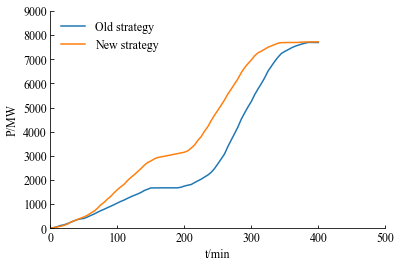

In [2]:
plt.rc('font',family='Times New Roman', weight = 'regular', size = 12)
f = open('../Data/2dline_data.txt','r')
contents = f.readlines()
X =[]
old = []
new = []


num_vertices = len(contents)
# print(num_vertices)
# Convert all the vertex lines to a list of lists
vertex_list = [list(map(float, contents[i].strip().split('\t'))) for i in list(range(0, num_vertices))]
data = np.array(vertex_list)
#print(data)

import matplotlib
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
 #取消图例的外边框


fig,ax = plt.subplots()



plt.xlabel('t/min')
plt.ylabel('P/MW')

#边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
yticks = range(0,9001,1000)
ax.set_yticks(yticks)
xticks = range(0,501,100)
ax.set_xticks(xticks)

# # 设置xtick和ytick的方向：in、out、inout



"""set min and max value for axes"""
ax.set_ylim([0,9000])
ax.set_xlim([0,500])

x = data[:,0]
old = data[:,1]
new = data [:,2]
#label="Old stratedy"
#label="New strategy"
line1 = plt.plot(x,old, label="Old strategy")
line2 = plt.plot(x,new, label="New strategy")

#plt.legend([line1, line2], ['Old stratedy', 'New strategy'], loc='upper left',frameon=False)


"""open the grid"""
plt.grid(False)
#图例的位置，不显示边框
plt.legend(loc='upper left',frameon=False)
#plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
 
plt.show()

## 二维散点，三维散点，标签


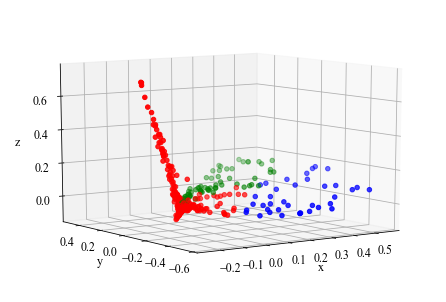

In [7]:
def draw_Point_Cloud(Points, Lables, axis = True, **kags):
    #%matplotlib inline
    from mpl_toolkits.mplot3d import Axes3D
    x_axis = Points[:,0]
    y_axis = Points[:,1]
    z_axis = Points[:,2]
    fig = plt.figure() 
    ax = Axes3D(fig) 

    ax.scatter(x_axis, y_axis, z_axis, c = Lables)
    # 设置坐标轴显示以及旋转角度
    ax.set_xlabel('x') 
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(elev=10,azim=235)
    if not axis:
        #关闭显示坐标轴
        plt.axis('off')
    
    plt.show()

    
import h5py
    
with h5py.File('../Data/3d_scatter_data.h5', 'r') as f:
    x, y = f['data'][()], f['label'][()]
    
color_dict = {0:'r', 1:'b', 2:'g'}
color_list = np.array([color_dict[x] for x in y])  
draw_Point_Cloud(x, color_list)

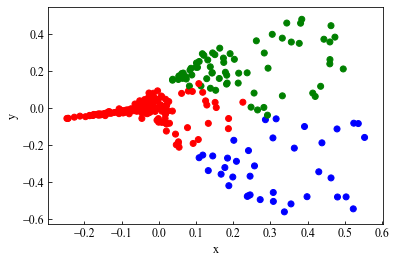

In [8]:
def draw_Points(Points, Lables, axis = True, **kags):
    #%matplotlib inline
    
    x_axis = Points[:,0]
    y_axis = Points[:,1]
    fig = plt.figure() 
   # ax = Axes3D(fig) 

    plt.scatter(x_axis, y_axis, c = Lables)
    # 设置坐标轴显示以及旋转角度
    plt.xlabel('x')
    plt.ylabel('y')

    if not axis:
        #关闭显示坐标轴
        plt.axis('off')
    
    plt.show()
    
#用dict 指定每一类的颜色
color_dict = {0:'r', 1:'b', 2:'g'}
color_list = np.array([color_dict[x] for x in y])  

draw_Points(x, np.squeeze(color_list))

## 曲线插值 待完成，不完整

In [12]:
import pandas as pd
data = pd.read_csv('../Data/data923.csv')


In [13]:
c = data.values

In [14]:
x = np.arange(0, 8, 1) #左闭右闭每0.09间隔生成一个数
y = np.arange(0, 0.8, 0.1) 
from scipy import interpolate
f = interpolate.interp2d(x, y, c, kind='cubic')



In [15]:
xnew = np.arange(0, 32, 1)#(31,)
ynew = np.arange(0, 3.2, 0.1)#(31,)
znew = f(xnew, ynew)#(31,31)

<Figure size 432x288 with 0 Axes>

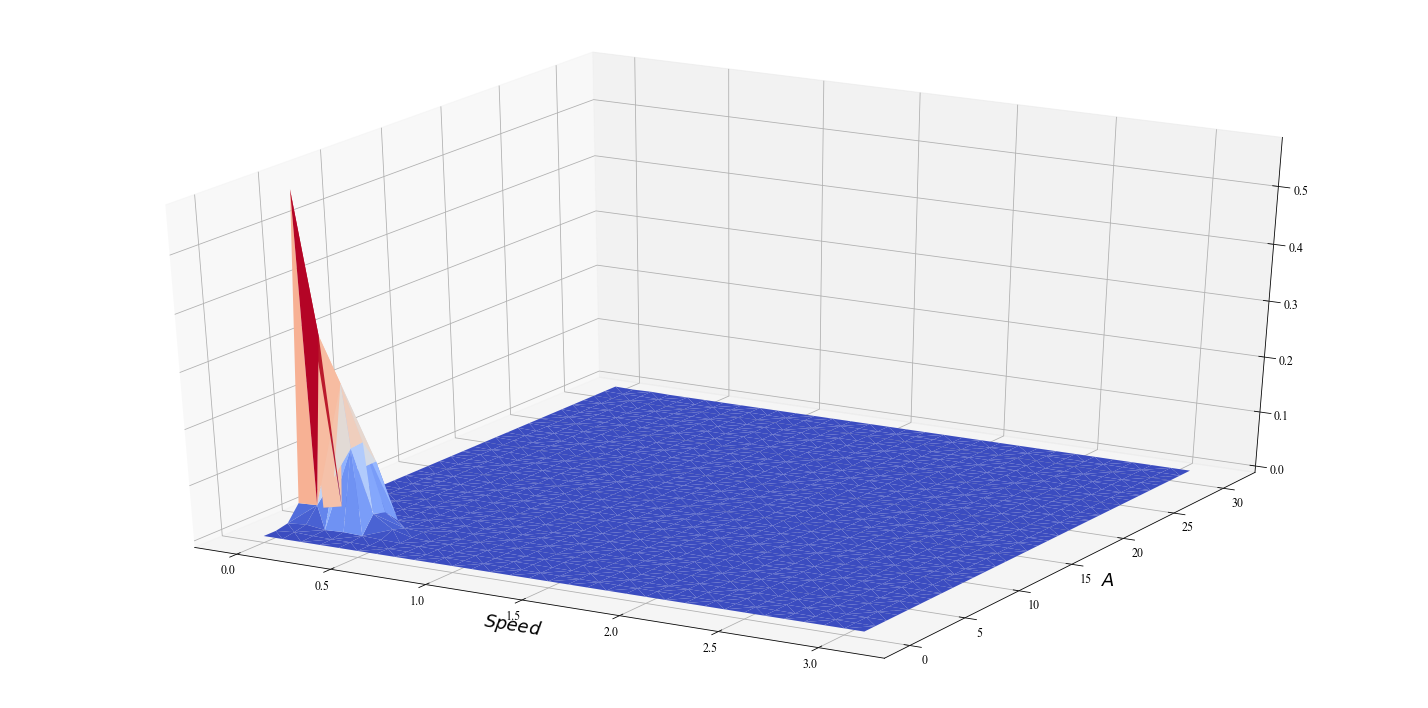

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import seaborn as sns
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
xx1, yy1 = np.meshgrid(xnew, ynew)#执行之后，xx1.shape=(31,31),yy1.shape=(31,31)
newshape = (xx1.shape[0])*(xx1.shape[0])
y_input = xx1.reshape(newshape)
x_input = yy1.reshape(newshape)
z_input = znew.reshape(newshape)
#画图
#sns.set(style='ticks')
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(x_input,y_input,z_input,cmap=cm.coolwarm)
 
# plt.xlim((0.1,0.9))
# plt.xticks([0.1,0.3,0.5,0.7,0.9])
# plt.yticks([0.1,0.3,0.5,0.7,0.9])
#s 0-80, -4,4
ax.set_xlabel(r'$Speed$',fontdict={'color': 'black',
                             'family': 'Times New Roman',
                             'weight': 'normal',
                             'size': 18})
ax.set_ylabel(r'$A$',fontdict={'color': 'black',
                             'family': 'Times New Roman',
                             'weight': 'normal',
                             'size': 18})
ax.set_zlabel('',fontdict={'color': 'black',
                             'family': 'Times New Roman',
                             'weight': 'normal',
                             'size': 18})
 
plt.tight_layout()
# plt.savefig('loc_svg/alpha_epsilon2.svg',dpi=600) #指定分辨率保存
plt.show()
plt.savefig('fig_dog.png')

In [17]:
!pip install seaborn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
